![alt text](./image_files/pageheader_rose2_babies.jpg)

# Data Science in Medicine using Python

### Author: Dr Gusztav Belteki

### 1. Import required libraries and modules and set options

In [1]:
# It is good practice to do it as a first thing in the Notebook

# Standard library modules
import datetime
import sys
import os

# External data science libraries and modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

# Set options
mpl.style.use('classic')
mpl.rcParams['figure.facecolor'] = 'w'
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [2]:
# Check and record the version the packages and modules you are using

print(f'Python version: {sys.version}')
print(f'numPy version: {np.__version__}')
print(f'pandas version: {pd.__version__}')
print(f'matplotlib version: {mpl.__version__}')

Python version: 3.7.9 (default, Aug 31 2020, 07:22:35) 
[Clang 10.0.0 ]
numPy version: 1.19.2
pandas version: 1.1.3
matplotlib version: 3.3.2


### 2. Summary of the data processing we did so far and a little reminder

##### "Computer programs are for human to read and occasionally for computers to run"

You want to be more verbose particularly when learning Python

In [3]:
%%time

# From the files in 'Data' sub-directory only consider those ones which contain 'slow_Measurement'
flist = [fle for fle in os.listdir('data') if 'slow_Measurement' in fle]

data_dict = {} # Creates an empty dictionary

for file in flist: # Loop through all relevant data files
    
    print(datetime.datetime.now(), file)
    
    # The relative filepath to the files
    path = os.path.join('data', file,)
    
    # Use the specific part of the filename as a unique key for the dictionary
    tag = file[11:-25]
    
    # Import data, parse the 'Date' and 'Time' columns as datetime and combine them
    data_dict[tag] = pd.read_csv(path, parse_dates = [['Date', 'Time']])
    # Set the combined 'Date_Time' column as row index 
    data_dict[tag] = data_dict[tag].set_index('Date_Time')
    
    # Remove the '5001' pre-tag from the column names
    new_columns = [item[5:] for item in data_dict[tag].columns if item.startswith('5001')]
    new_columns = ['Time [ms]', 'Rel.Time [s]'] + new_columns
    data_dict[tag].columns = new_columns
    
    # As data were retrieved in two batches every second, combine these data by using the mean() function
    data_dict[tag] = data_dict[tag].resample('1S').mean()
    
    # Drop columes which have barely any data
    columns_to_drop = ['Tispon [s]', 'I:Espon (I-Part) [no unit]', 'I:Espon (E-Part) [no unit]']
    data_dict[tag] = data_dict[tag].drop(columns_to_drop, axis = 1)
    
    # Normalise relevant parameters to body weight
    # Weights in kilogram
    weights = {'2019-01-14_124200.144' : 0.575, '2019-01-16_090910.423' : 0.575 , '2020-11-02_134238.904' : 775}
    # parameters to normalise
    to_normalise = ['MVe [L/min]', 'MVi [L/min]', 'Cdyn [L/bar]', 'MVespon [L/min]', 'MVemand [L/min]', 
        'VTmand [mL]', 'VTispon [mL]', 'VTmand [L]', 'VTspon [L]', 'VTemand [mL]', 'VTespon [mL]', 
         'VTimand [mL]', 'VT [mL]', 'MV [L/min]',  'VTspon [mL]', 'VTe [mL]', 'VTi [mL]', 'MVleak [L/min]',]
    for par in to_normalise:
        data_dict[tag][f'{par[:-1]}/kg{par[-1]}'] = data_dict[tag][par] / weights[tag]

2021-05-12 05:00:22.812633 CsvLogBase_2019-01-16_090910.423_slow_Measurement.csv.zip
2021-05-12 05:00:24.117491 CsvLogBase_2020-11-02_134238.904_slow_Measurement.csv.zip
2021-05-12 05:00:28.160684 CsvLogBase_2019-01-14_124200.144_slow_Measurement.csv.zip
CPU times: user 5.42 s, sys: 1.15 s, total: 6.57 s
Wall time: 6.56 s


In [4]:
[value.shape for value in data_dict.values()]

[(101443, 60), (344677, 60), (104934, 60)]

### 2. Choose one recording further explorative data analysis

We will see later how we can do similar analysis on several recordings at the same time

In [46]:
recording = '2020-11-02_134238.904'

In [47]:
data_dict[recording].head()

,Time [ms],Rel.Time [s],MVe [L/min],MVi [L/min],Cdyn [L/bar],R [mbar/L/s],MVespon [L/min],Rpat [mbar/L/s],MVemand [L/min],FlowDev [L/min],VTmand [mL],r2 [no unit],VTispon [mL],Pmin [mbar],Pmean [mbar],PEEP [mbar],RRmand [1/min],PIP [mbar],VTmand [L],VTspon [L],VTemand [mL],VTespon [mL],VTimand [mL],VT [mL],% leak [%],RRspon [1/min],% MVspon [%],MV [L/min],RRtrig [1/min],RR [1/min],I (I:E) [no unit],E (I:E) [no unit],FiO2 [%],VTspon [mL],E [mbar/L],TC [s],TCe [s],C20/Cdyn [no unit],VTe [mL],VTi [mL],EIP [mbar],MVleak [L/min],MVe [L/min/kg],MVi [L/min/kg],Cdyn [L/bar/kg],MVespon [L/min/kg],MVemand [L/min/kg],VTmand [mL/kg],VTispon [mL/kg],VTmand [L/kg],VTspon [L/kg],VTemand [mL/kg],VTespon [mL/kg],VTimand [mL/kg],VT [mL/kg],MV [L/min/kg],VTspon [mL/kg],VTe [mL/kg],VTi [mL/kg],MVleak [L/min/kg]
Date_Time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-11-02 13:42:39,1.604325e+12,0.0,0.2,0.21,0.21,146.0,0.0,128.0,0.2,6.9,3.4,0.98,0.0,4.4,10.0,4.6,61.0,22.0,0.00,0.0,3.4,0.0,3.4,3.4,0.0,0.0,0.0,0.2,0.0,61.0,1.0,2.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000258,0.000271,0.000271,0.0,0.000258,0.004387,0.0,0.000000,0.0,0.004387,0.0,0.004387,0.004387,0.000258,NaN,NaN,NaN,NaN
2020-11-02 13:42:40,1.604325e+12,0.5,0.2,0.21,0.22,146.0,0.0,128.0,0.2,6.9,8.2,0.98,0.0,4.5,10.0,5.0,61.0,23.0,0.01,0.0,8.2,0.0,3.6,8.2,0.0,0.0,0.0,0.2,0.0,61.0,1.0,2.0,25.0,0.0,4774.0,0.03,0.11,0.55,3.4,3.4,21.0,0.0,0.000258,0.000271,0.000284,0.0,0.000258,0.010581,0.0,0.000013,0.0,0.010581,0.0,0.004645,0.010581,0.000258,0.0,0.004387,0.004387,0.0
2020-11-02 13:42:41,1.604325e+12,1.5,0.2,0.21,0.26,154.0,0.0,136.0,0.2,6.9,4.1,0.98,0.0,4.9,10.0,4.8,61.0,19.0,0.00,0.0,4.1,0.0,3.5,4.1,0.0,0.0,0.0,0.2,0.0,61.0,1.0,2.0,25.0,0.0,4597.0,0.03,0.21,0.55,8.2,3.6,22.0,0.0,0.000258,0.000271,0.000335,0.0,0.000258,0.005290,0.0,0.000000,0.0,0.005290,0.0,0.004516,0.005290,0.000258,0.0,0.010581,0.004645,0.0
2020-11-02 13:42:42,1.604325e+12,2.5,0.2,0.21,0.29,154.0,0.0,136.0,0.2,6.9,5.5,0.98,0.0,4.2,9.8,5.1,61.0,18.0,0.01,0.0,5.5,0.0,3.8,5.5,0.0,0.0,0.0,0.2,0.0,61.0,1.0,2.0,25.0,0.0,3798.0,0.04,0.12,0.66,4.1,3.5,19.0,0.0,0.000258,0.000271,0.000374,0.0,0.000258,0.007097,0.0,0.000013,0.0,0.007097,0.0,0.004903,0.007097,0.000258,0.0,0.005290,0.004516,0.0
2020-11-02 13:42:43,1.604325e+12,3.5,0.2,0.20,0.40,193.0,0.0,177.0,0.2,6.9,2.6,0.77,0.0,4.5,9.8,5.0,61.0,17.0,0.00,0.0,2.6,0.0,4.3,2.6,0.0,0.0,0.0,0.2,0.0,61.0,1.0,2.0,25.0,0.0,3408.0,0.05,0.19,0.66,5.5,3.8,18.0,0.0,0.000258,0.000258,0.000516,0.0,0.000258,0.003355,0.0,0.000000,0.0,0.003355,0.0,0.005548,0.003355,0.000258,0.0,0.007097,0.004903,0.0


In [48]:
data_dict[recording].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 344677 entries, 2020-11-02 13:42:39 to 2020-11-06 13:27:15
Freq: S
Data columns (total 60 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Time [ms]           344677 non-null  float64
 1   Rel.Time [s]        344677 non-null  float64
 2   MVe [L/min]         344519 non-null  float64
 3   MVi [L/min]         344519 non-null  float64
 4   Cdyn [L/bar]        343959 non-null  float64
 5   R [mbar/L/s]        341986 non-null  float64
 6   MVespon [L/min]     344519 non-null  float64
 7   Rpat [mbar/L/s]     341285 non-null  float64
 8   MVemand [L/min]     344519 non-null  float64
 9   FlowDev [L/min]     344563 non-null  float64
 10  VTmand [mL]         344453 non-null  float64
 11  r2 [no unit]        344424 non-null  float64
 12  VTispon [mL]        344520 non-null  float64
 13  Pmin [mbar]         344563 non-null  float64
 14  Pmean [mbar]        344563 non-null  float

### 3. Distribution of the data

In [49]:
percentiles_to_show = [0.001, 0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.95, 0.99, 0.999]
descriptive_stats = round(data_dict[recording].describe(percentiles = percentiles_to_show ), 2)
descriptive_stats

,Time [ms],Rel.Time [s],MVe [L/min],MVi [L/min],Cdyn [L/bar],R [mbar/L/s],MVespon [L/min],Rpat [mbar/L/s],MVemand [L/min],FlowDev [L/min],VTmand [mL],r2 [no unit],VTispon [mL],Pmin [mbar],Pmean [mbar],PEEP [mbar],RRmand [1/min],PIP [mbar],VTmand [L],VTspon [L],VTemand [mL],VTespon [mL],VTimand [mL],VT [mL],% leak [%],RRspon [1/min],% MVspon [%],MV [L/min],RRtrig [1/min],RR [1/min],I (I:E) [no unit],E (I:E) [no unit],FiO2 [%],VTspon [mL],E [mbar/L],TC [s],TCe [s],C20/Cdyn [no unit],VTe [mL],VTi [mL],EIP [mbar],MVleak [L/min],MVe [L/min/kg],MVi [L/min/kg],Cdyn [L/bar/kg],MVespon [L/min/kg],MVemand [L/min/kg],VTmand [mL/kg],VTispon [mL/kg],VTmand [L/kg],VTspon [L/kg],VTemand [mL/kg],VTespon [mL/kg],VTimand [mL/kg],VT [mL/kg],MV [L/min/kg],VTspon [mL/kg],VTe [mL/kg],VTi [mL/kg],MVleak [L/min/kg]
count,3.446770e+05,344677.00,344519.00,344519.00,343959.00,341986.00,344519.00,341285.00,344519.00,344563.00,344453.00,344424.00,344520.00,344563.00,344563.00,344563.00,344563.00,344563.00,344453.00,344520.00,344453.00,344520.00,344457.00,344453.00,344519.00,256176.00,344519.00,344519.00,344519.00,344519.00,344558.00,344558.00,344563.00,343318.00,338973.00,342758.00,343260.00,338726.00,343260.00,343265.00,343361.00,343318.00,344519.0,344519.00,343959.00,344519.0,344519.0,344453.00,344520.00,344453.0,344520.0,344453.00,344520.00,344457.00,344453.00,344519.00,343318.00,343260.00,343265.00,343318.00
mean,1.604497e+12,172337.50,0.22,0.26,0.25,274.05,0.00,257.39,0.22,7.13,4.01,0.97,0.00,5.57,11.48,5.93,60.57,24.17,0.00,0.00,3.72,0.01,4.34,4.01,10.78,0.19,0.13,0.24,1.22,60.72,1.00,2.03,34.64,0.01,4265.00,0.07,0.14,0.72,3.72,4.34,23.85,0.04,0.0,0.00,0.00,0.0,0.0,0.01,0.00,0.0,0.0,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.01,0.00
std,9.949982e+07,99499.82,0.03,0.14,0.17,165.36,0.00,167.92,0.03,0.72,0.76,0.05,0.05,0.74,1.42,0.48,2.46,4.25,0.00,0.00,0.78,0.18,1.09,0.76,16.15,0.69,0.50,0.13,4.83,2.59,0.03,0.27,13.59,0.19,992.64,0.11,0.05,0.36,0.78,1.04,4.34,0.31,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
min,1.604325e+12,0.00,0.00,0.00,0.00,29.40,0.00,15.80,0.00,6.40,0.60,0.00,0.00,-0.20,1.60,0.50,59.00,2.00,0.00,0.00,0.60,0.00,0.60,0.60,0.00,0.00,0.00,0.00,0.00,59.00,1.00,1.00,21.00,0.00,0.00,0.00,0.01,0.23,0.60,0.60,1.80,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
0.1%,1.604325e+12,344.18,0.04,0.13,0.03,51.10,0.00,44.40,0.04,6.70,1.10,0.13,0.00,3.60,8.20,4.20,60.00,14.00,0.00,0.00,0.80,0.00,1.10,1.10,0.00,0.00,0.00,0.09,0.00,60.00,1.00,1.00,21.00,0.00,0.00,0.00,0.06,0.31,0.80,1.10,14.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1%,1.604328e+12,3446.26,0.14,0.20,0.09,90.40,0.00,74.40,0.14,6.70,2.30,0.81,0.00,4.30,9.30,4.60,60.00,18.00,0.00,0.00,1.90,0.00,2.50,2.30,0.00,0.00,0.00,0.19,0.00,60.00,1.00,1.80,21.00,0.00,2263.00,0.02,0.09,0.37,1.90,2.50,17.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5%,1.604342e+12,17233.30,0.17,0.21,0.16,121.00,0.00,102.00,0.17,6.80,3.10,0.91,0.00,4.80,10.00,5.20,60.00,20.00,0.00,0.00,2.60,0.00,3.30,3.10,0.00,0.00,0.00,0.21,0.00,60.00,1.00,2.00,25.00,0.00,3018.00,0.03,0.10,0.45,2.60,3.30,19.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
10%,1.604359e+12,34467.10,0.19,0.21,0.18,136.00,0.00,116.00,0.19,6.80,3.40,0.93,0.00,5.10,10.00,5.40,60.00,21.00,0.00,0.00,2.90,0.00,3.50,3.40,0.00,0.00,0.00,0.21,0.00,60.00,1.00,2.00,25.00,0.00,3305.00,0.03,0.10,0.50,2.90,3.50,20.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1.604411e+12,86168.50,0.21,0.23,0.21,162.00,0.00,143.00,0.21,6.90,3.60,0.96,0.00,5.40,11.00,5.70,60.00,22.00,0.00,0.00,3.30,0.00,3.80,3.60,0.00,0.00,0.00,0.23,0.00,60.00,1.00,2.00,26.00,0.00,3679.00,0.04,0.11,0.57,3.30,3.80,21.00,0.01,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,1.604497e+12,172337.50,

In [50]:
# Save statistics into an Excwl file
writer = pd.ExcelWriter(os.path.join('results', f'{recording}_descriptive_stats.xlsx'))
descriptive_stats.to_excel(writer, 'stats')
writer.save()

##### One picture speaks a thousand words

The main purpose of generating graphs is not to present the data to others but for yourself to visualise and inspect them.

In [51]:
filetype = 'jpg'
dpi = 200

columns_to_plot = data_dict[tag].columns[2:]

# Add more useful customisation
meanprops = {'marker':'s', 'markeredgecolor':'black', 'markerfacecolor':'black'}
medianprops = {'color': 'black', 'linewidth': 2}
boxprops = {'color': 'black', 'linestyle': '-'}
whiskerprops = { 'color': 'black', 'linestyle': '-'}
capprops = {'color': 'black', 'linestyle': '-'}
flierprops = {'color': 'black', 'marker': '.'}

fig, axes = plt.subplots((len(columns_to_plot)+2)//5, 5, figsize = (16, (len(columns_to_plot)+2)//5 * 4))
fig.subplots_adjust(left=None, bottom=0.2, right=None, top=None, wspace=0.3, hspace=0.5)
axes = axes.ravel()

for i, column in enumerate(columns_to_plot):
    ax = axes[i]
    ax.boxplot(data_dict[recording][column].dropna(), 
    whis = [5, 95], showfliers = False, showmeans = True, meanprops = meanprops,
    medianprops=medianprops, boxprops=boxprops, whiskerprops=whiskerprops, 
    capprops=capprops,flierprops = flierprops);

    ax.set_title(column.split(' ')[0])
    ax.grid(True)
    ax.set_xlabel(column.split(' ')[-1])

fig.savefig(os.path.join('results', f'{recording}_boxplots.{filetype}'), 
    dpi = dpi, format = filetype, bbox_inches='tight', pad_inches=0.1,)

plt.close()

In [52]:
filetype = 'jpg'
dpi = 200

columns_to_plot = data_dict[recording].columns[2:]

fig, axes = plt.subplots((len(columns_to_plot)+2)//5, 5, figsize = (16, (len(columns_to_plot)+2)//5 * 4))
fig.subplots_adjust(left=None, bottom=0.2, right=None, top=None, wspace=0.3, hspace=0.5)
axes = axes.ravel()

for i, column in enumerate(columns_to_plot):
    ax = axes[i]
    ax.hist(data_dict[recording][column].dropna(), bins = 30, color = 'black', alpha = 0.7);

    ax.set_title(column.split(' ')[0])
    ax.grid(True)
    ax.set_xlabel(column.split(' ')[-1])
    if i % 5 == 0:
        ax.set_ylabel('data points')

fig.savefig(os.path.join('results', f'{recording}_histograms.{filetype}'), 
    dpi = dpi, format = filetype, bbox_inches='tight', pad_inches=0.1,)

plt.close()

There are many parameters. Some of them are close to normal distribution, some of them are clearly not normally distributed.

### 4. Let us focus on two parameters:

`VTemand [mL/kg]`   - the tidal volume of ventilator inflations

`PIP [mbar]`        - peak inspiratory pressure of ventilator inflations

`RRmand [1/min]`    - rate of ventilator inflations

##### You will need to do this for all parameters you want to study

`GIGO` - _"Garbage in garbage out"_

In [53]:
selection = ['VTemand [mL/kg]', 'PIP [mbar]', 'RRmand [1/min]']

percentiles_to_show = [0.001, 0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.95, 0.99, 0.999]
descriptive_stats = round(data_dict[tag][selection].describe(percentiles = percentiles_to_show ), 2)
descriptive_stats

,VTemand [mL/kg],PIP [mbar],RRmand [1/min]
count,344453.00,344563.00,344563.00
mean,0.00,24.17,60.57
std,0.00,4.25,2.46
min,0.00,2.00,59.00
0.1%,0.00,14.00,60.00
1%,0.00,18.00,60.00
5%,0.00,20.00,60.00
10%,0.00,21.00,60.00
25%,0.00,22.00,60.00
50%,0.00,23.00,60.00


#### How many missing values for each parameter

In [54]:
data_dict[recording][selection].isnull()

,VTemand [mL/kg],PIP [mbar],RRmand [1/min]
Date_Time,,,
2020-11-02 13:42:39,False,False,False
2020-11-02 13:42:40,False,False,False
2020-11-02 13:42:41,False,False,False
2020-11-02 13:42:42,False,False,False
2020-11-02 13:42:43,False,False,False
...,...,...,...
2020-11-06 13:27:11,False,False,False
2020-11-06 13:27:12,False,False,False
2020-11-06 13:27:13,False,False,False


In [55]:
data_dict[recording][selection].isnull().sum() / len(data_dict[recording][selection])

VTemand [mL/kg]    0.000650
PIP [mbar]         0.000331
RRmand [1/min]     0.000331
dtype: float64

In [56]:
len(data_dict[recording][selection])

344677

In [57]:
data_dict[recording][selection].isnull().sum() / len(data_dict[recording][selection])

VTemand [mL/kg]    0.000650
PIP [mbar]         0.000331
RRmand [1/min]     0.000331
dtype: float64

`Vectorised computation` and `broadcasting`

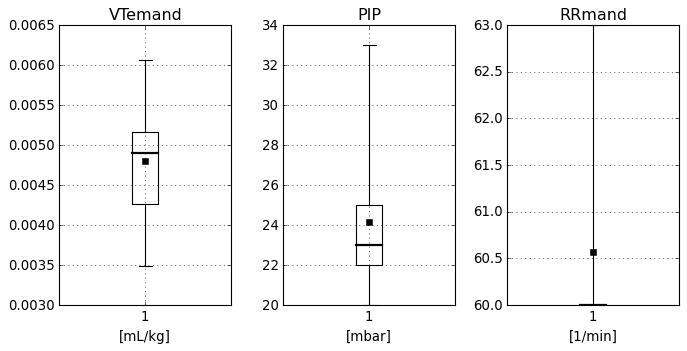

In [58]:
filetype = 'jpg'
dpi = 200

columns_to_plot = selection

# Add more useful customisation
meanprops = {'marker':'s', 'markeredgecolor':'black', 'markerfacecolor':'black'}
medianprops = {'color': 'black', 'linewidth': 2}
boxprops = {'color': 'black', 'linestyle': '-'}
whiskerprops = { 'color': 'black', 'linestyle': '-'}
capprops = {'color': 'black', 'linestyle': '-'}
flierprops = {'color': 'black', 'marker': '.'}

fig, axes = plt.subplots(1, 3, figsize = (10, 5))
fig.subplots_adjust(left=None, bottom=0.2, right=None, top=None, wspace=0.3, hspace=0.5)
axes = axes.ravel()

for i, column in enumerate(columns_to_plot):
    ax = axes[i]
    ax.boxplot(data_dict[recording][column].dropna(), 
    whis = [5, 95], showfliers = False, showmeans = True, meanprops = meanprops,
    medianprops=medianprops, boxprops=boxprops, whiskerprops=whiskerprops, 
    capprops=capprops,flierprops = flierprops);

    ax.set_title(column.split(' ')[0])
    ax.grid(True)
    ax.set_xlabel(column.split(' ')[-1])

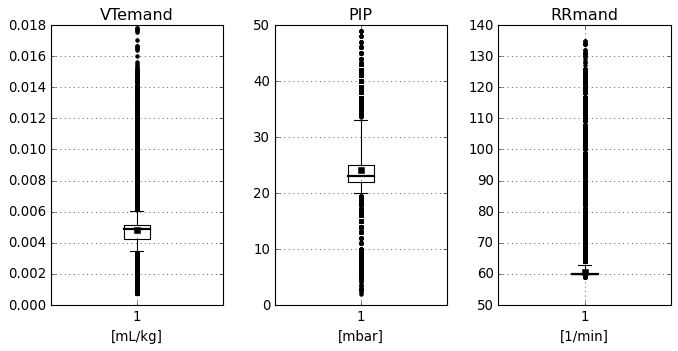

In [59]:
filetype = 'jpg'
dpi = 200

columns_to_plot = selection

# Add more useful customisation
meanprops = {'marker':'s', 'markeredgecolor':'black', 'markerfacecolor':'black'}
medianprops = {'color': 'black', 'linewidth': 2}
boxprops = {'color': 'black', 'linestyle': '-'}
whiskerprops = { 'color': 'black', 'linestyle': '-'}
capprops = {'color': 'black', 'linestyle': '-'}
flierprops = {'color': 'black', 'marker': '.'}

fig, axes = plt.subplots(1, 3, figsize = (10, 5))
fig.subplots_adjust(left=None, bottom=0.2, right=None, top=None, wspace=0.3, hspace=0.5)
axes = axes.ravel()

for i, column in enumerate(columns_to_plot):
    ax = axes[i]
    ax.boxplot(data_dict[recording][column].dropna(), 
    whis = [5, 95], showfliers = True, showmeans = True, meanprops = meanprops,
    medianprops=medianprops, boxprops=boxprops, whiskerprops=whiskerprops, 
    capprops=capprops,flierprops = flierprops);

    ax.set_title(column.split(' ')[0])
    ax.grid(True)
    ax.set_xlabel(column.split(' ')[-1])

### 5. What to do with missing data

### Option 1: Remove the whole column and do not use the parameter during the analysis

- It is the only option if a large proportion (>50%) of data points are missing
- It is a problem is this parameter was you main interest

In [60]:
data_dict[recording].columns

Index(['Time [ms]', 'Rel.Time [s]', 'MVe [L/min]', 'MVi [L/min]',
       'Cdyn [L/bar]', 'R [mbar/L/s]', 'MVespon [L/min]', 'Rpat [mbar/L/s]',
       'MVemand [L/min]', 'FlowDev [L/min]', 'VTmand [mL]', 'r2 [no unit]',
       'VTispon [mL]', 'Pmin [mbar]', 'Pmean [mbar]', 'PEEP [mbar]',
       'RRmand [1/min]', 'PIP [mbar]', 'VTmand [L]', 'VTspon [L]',
       'VTemand [mL]', 'VTespon [mL]', 'VTimand [mL]', 'VT [mL]', '% leak [%]',
       'RRspon [1/min]', '% MVspon [%]', 'MV [L/min]', 'RRtrig [1/min]',
       'RR [1/min]', 'I (I:E) [no unit]', 'E (I:E) [no unit]', 'FiO2 [%]',
       'VTspon [mL]', 'E [mbar/L]', 'TC [s]', 'TCe [s]', 'C20/Cdyn [no unit]',
       'VTe [mL]', 'VTi [mL]', 'EIP [mbar]', 'MVleak [L/min]',
       'MVe [L/min/kg]', 'MVi [L/min/kg]', 'Cdyn [L/bar/kg]',
       'MVespon [L/min/kg]', 'MVemand [L/min/kg]', 'VTmand [mL/kg]',
       'VTispon [mL/kg]', 'VTmand [L/kg]', 'VTspon [L/kg]', 'VTemand [mL/kg]',
       'VTespon [mL/kg]', 'VTimand [mL/kg]', 'VT [mL/kg]', 'MV [L

In [61]:
selection

['VTemand [mL/kg]', 'PIP [mbar]', 'RRmand [1/min]']

In [62]:
# axis 1 means columns
data_dict_cleaned_1 = data_dict[recording].drop(selection, axis = 1)
data_dict_cleaned_1.head()

,Time [ms],Rel.Time [s],MVe [L/min],MVi [L/min],Cdyn [L/bar],R [mbar/L/s],MVespon [L/min],Rpat [mbar/L/s],MVemand [L/min],FlowDev [L/min],VTmand [mL],r2 [no unit],VTispon [mL],Pmin [mbar],Pmean [mbar],PEEP [mbar],VTmand [L],VTspon [L],VTemand [mL],VTespon [mL],VTimand [mL],VT [mL],% leak [%],RRspon [1/min],% MVspon [%],MV [L/min],RRtrig [1/min],RR [1/min],I (I:E) [no unit],E (I:E) [no unit],FiO2 [%],VTspon [mL],E [mbar/L],TC [s],TCe [s],C20/Cdyn [no unit],VTe [mL],VTi [mL],EIP [mbar],MVleak [L/min],MVe [L/min/kg],MVi [L/min/kg],Cdyn [L/bar/kg],MVespon [L/min/kg],MVemand [L/min/kg],VTmand [mL/kg],VTispon [mL/kg],VTmand [L/kg],VTspon [L/kg],VTespon [mL/kg],VTimand [mL/kg],VT [mL/kg],MV [L/min/kg],VTspon [mL/kg],VTe [mL/kg],VTi [mL/kg],MVleak [L/min/kg]
Date_Time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-11-02 13:42:39,1.604325e+12,0.0,0.2,0.21,0.21,146.0,0.0,128.0,0.2,6.9,3.4,0.98,0.0,4.4,10.0,4.6,0.00,0.0,3.4,0.0,3.4,3.4,0.0,0.0,0.0,0.2,0.0,61.0,1.0,2.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000258,0.000271,0.000271,0.0,0.000258,0.004387,0.0,0.000000,0.0,0.0,0.004387,0.004387,0.000258,NaN,NaN,NaN,NaN
2020-11-02 13:42:40,1.604325e+12,0.5,0.2,0.21,0.22,146.0,0.0,128.0,0.2,6.9,8.2,0.98,0.0,4.5,10.0,5.0,0.01,0.0,8.2,0.0,3.6,8.2,0.0,0.0,0.0,0.2,0.0,61.0,1.0,2.0,25.0,0.0,4774.0,0.03,0.11,0.55,3.4,3.4,21.0,0.0,0.000258,0.000271,0.000284,0.0,0.000258,0.010581,0.0,0.000013,0.0,0.0,0.004645,0.010581,0.000258,0.0,0.004387,0.004387,0.0
2020-11-02 13:42:41,1.604325e+12,1.5,0.2,0.21,0.26,154.0,0.0,136.0,0.2,6.9,4.1,0.98,0.0,4.9,10.0,4.8,0.00,0.0,4.1,0.0,3.5,4.1,0.0,0.0,0.0,0.2,0.0,61.0,1.0,2.0,25.0,0.0,4597.0,0.03,0.21,0.55,8.2,3.6,22.0,0.0,0.000258,0.000271,0.000335,0.0,0.000258,0.005290,0.0,0.000000,0.0,0.0,0.004516,0.005290,0.000258,0.0,0.010581,0.004645,0.0
2020-11-02 13:42:42,1.604325e+12,2.5,0.2,0.21,0.29,154.0,0.0,136.0,0.2,6.9,5.5,0.98,0.0,4.2,9.8,5.1,0.01,0.0,5.5,0.0,3.8,5.5,0.0,0.0,0.0,0.2,0.0,61.0,1.0,2.0,25.0,0.0,3798.0,0.04,0.12,0.66,4.1,3.5,19.0,0.0,0.000258,0.000271,0.000374,0.0,0.000258,0.007097,0.0,0.000013,0.0,0.0,0.004903,0.007097,0.000258,0.0,0.005290,0.004516,0.0
2020-11-02 13:42:43,1.604325e+12,3.5,0.2,0.20,0.40,193.0,0.0,177.0,0.2,6.9,2.6,0.77,0.0,4.5,9.8,5.0,0.00,0.0,2.6,0.0,4.3,2.6,0.0,0.0,0.0,0.2,0.0,61.0,1.0,2.0,25.0,0.0,3408.0,0.05,0.19,0.66,5.5,3.8,18.0,0.0,0.000258,0.000258,0.000516,0.0,0.000258,0.003355,0.0,0.000000,0.0,0.0,0.005548,0.003355,0.000258,0.0,0.007097,0.004903,0.0


### Option 2: Remove the rows with missing data points

In [63]:
selection

['VTemand [mL/kg]', 'PIP [mbar]', 'RRmand [1/min]']

In [64]:
# axis = 0 means rows, it is the default you do not need to write it
data_dict_cleaned_2 = data_dict[recording].dropna(how = 'any', subset = selection, axis = 0)

In [65]:
data_dict_cleaned_2[selection].isnull().sum() / len(data_dict[recording][selection])

VTemand [mL/kg]    0.0
PIP [mbar]         0.0
RRmand [1/min]     0.0
dtype: float64

In [66]:
data_dict_cleaned_2.isnull().sum() / len(data_dict[recording][selection])

Time [ms]             0.000000
Rel.Time [s]          0.000000
MVe [L/min]           0.000003
MVi [L/min]           0.000003
Cdyn [L/bar]          0.001436
R [mbar/L/s]          0.007157
MVespon [L/min]       0.000003
Rpat [mbar/L/s]       0.009191
MVemand [L/min]       0.000003
FlowDev [L/min]       0.000000
VTmand [mL]           0.000000
r2 [no unit]          0.000087
VTispon [mL]          0.000000
Pmin [mbar]           0.000000
Pmean [mbar]          0.000000
PEEP [mbar]           0.000000
RRmand [1/min]        0.000000
PIP [mbar]            0.000000
VTmand [L]            0.000000
VTspon [L]            0.000000
VTemand [mL]          0.000000
VTespon [mL]          0.000000
VTimand [mL]          0.000017
VT [mL]               0.000000
% leak [%]            0.000003
RRspon [1/min]        0.256193
% MVspon [%]          0.000003
MV [L/min]            0.000003
RRtrig [1/min]        0.000003
RR [1/min]            0.000003
I (I:E) [no unit]     0.000006
E (I:E) [no unit]     0.000006
FiO2 [%]


- This may introduce a bias into your data set for other parameters you want to study if the parameter you have cleaned up was not randomly missing

### Option 3: Replace with an aggregate value (mean, median etc)

- This is the choice if the value if the parameter is independent of values in the neighbouring rows

In [67]:
mean = data_dict[recording]['VTemand [mL/kg]'].mean()

data_dict_cleaned_3 = data_dict[recording].copy()
data_dict_cleaned_3['VTemand [mL/kg]'] = data_dict_cleaned_3['VTemand [mL/kg]'].fillna(mean)

In [68]:
selection

['VTemand [mL/kg]', 'PIP [mbar]', 'RRmand [1/min]']

In [69]:
data_dict_cleaned_3 = data_dict[recording].copy()

for par in selection:
    mean = data_dict[recording][par].mean()
    data_dict_cleaned_3[par] = data_dict_cleaned_3[par].fillna(value = mean)

In [70]:
data_dict_cleaned_3[selection].isnull().sum() / len(data_dict[recording][selection])

VTemand [mL/kg]    0.0
PIP [mbar]         0.0
RRmand [1/min]     0.0
dtype: float64

### Option 4: Interpolate missing data

- This is the choice for true time series data, when a data point is dependent on its neighbours


In [71]:
# Use the data in the row above

data_dict_cleaned_4 = data_dict[recording].copy()

for par in selection:
    mean = data_dict[recording][par].mean()
    data_dict_cleaned_4[par] = data_dict_cleaned_4[par].fillna(method = 'ffill')

In [72]:
data_dict_cleaned_4[selection].isnull().sum() / len(data_dict[recording][selection])

VTemand [mL/kg]    0.0
PIP [mbar]         0.0
RRmand [1/min]     0.0
dtype: float64

In [73]:
# Use linear interpolation

data_dict_cleaned_5 = data_dict[recording].copy()

for par in selection:
    mean = data_dict[recording][par].mean()
    data_dict_cleaned_5[par] = data_dict_cleaned_5[par].interpolate(method = 'linear')

In [74]:
data_dict_cleaned_5[selection].isnull().sum() / len(data_dict[recording][selection])

VTemand [mL/kg]    0.0
PIP [mbar]         0.0
RRmand [1/min]     0.0
dtype: float64

##### How to deal with missing data is a domain knowledge question not a data science question

### 6. Dealing with outliers

Similarly, what is an outlier is not a statistical or data science question but a biomedical question

In [75]:
round(data_dict[recording]['VTemand [mL/kg]'].describe(percentiles = percentiles_to_show ), 2)

count    344453.00
mean          0.00
std           0.00
min           0.00
0.1%          0.00
1%            0.00
5%            0.00
10%           0.00
25%           0.00
50%           0.00
75%           0.01
95%           0.01
99%           0.01
99.9%         0.01
max           0.02
Name: VTemand [mL/kg], dtype: float64

Let us conclude the VTemand values > 20 mL/kg are artifacts, represent situations when the ventilator circuit was open

In [76]:
data_dict[recording]['VTemand [mL/kg]'] > 20

Date_Time
2020-11-02 13:42:39    False
2020-11-02 13:42:40    False
2020-11-02 13:42:41    False
2020-11-02 13:42:42    False
2020-11-02 13:42:43    False
                       ...  
2020-11-06 13:27:11    False
2020-11-06 13:27:12    False
2020-11-06 13:27:13    False
2020-11-06 13:27:14    False
2020-11-06 13:27:15    False
Freq: S, Name: VTemand [mL/kg], Length: 344677, dtype: bool

In [77]:
# Remember: Python interprets True as 1 and False as 0

data = data_dict[recording]

sum(data['VTemand [mL/kg]'] > 20)

0

In [78]:
sum(data['VTemand [mL/kg]'] > 20) / len(data['VTemand [mL/kg]'])

0.0

In [79]:
data[data['VTemand [mL/kg]'] > 20]

,Time [ms],Rel.Time [s],MVe [L/min],MVi [L/min],Cdyn [L/bar],R [mbar/L/s],MVespon [L/min],Rpat [mbar/L/s],MVemand [L/min],FlowDev [L/min],VTmand [mL],r2 [no unit],VTispon [mL],Pmin [mbar],Pmean [mbar],PEEP [mbar],RRmand [1/min],PIP [mbar],VTmand [L],VTspon [L],VTemand [mL],VTespon [mL],VTimand [mL],VT [mL],% leak [%],RRspon [1/min],% MVspon [%],MV [L/min],RRtrig [1/min],RR [1/min],I (I:E) [no unit],E (I:E) [no unit],FiO2 [%],VTspon [mL],E [mbar/L],TC [s],TCe [s],C20/Cdyn [no unit],VTe [mL],VTi [mL],EIP [mbar],MVleak [L/min],MVe [L/min/kg],MVi [L/min/kg],Cdyn [L/bar/kg],MVespon [L/min/kg],MVemand [L/min/kg],VTmand [mL/kg],VTispon [mL/kg],VTmand [L/kg],VTspon [L/kg],VTemand [mL/kg],VTespon [mL/kg],VTimand [mL/kg],VT [mL/kg],MV [L/min/kg],VTspon [mL/kg],VTe [mL/kg],VTi [mL/kg],MVleak [L/min/kg]
Date_Time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [80]:
round(data[data['VTemand [mL/kg]'] > 20].describe(percentiles = percentiles_to_show), 3)

,Time [ms],Rel.Time [s],MVe [L/min],MVi [L/min],Cdyn [L/bar],R [mbar/L/s],MVespon [L/min],Rpat [mbar/L/s],MVemand [L/min],FlowDev [L/min],VTmand [mL],r2 [no unit],VTispon [mL],Pmin [mbar],Pmean [mbar],PEEP [mbar],RRmand [1/min],PIP [mbar],VTmand [L],VTspon [L],VTemand [mL],VTespon [mL],VTimand [mL],VT [mL],% leak [%],RRspon [1/min],% MVspon [%],MV [L/min],RRtrig [1/min],RR [1/min],I (I:E) [no unit],E (I:E) [no unit],FiO2 [%],VTspon [mL],E [mbar/L],TC [s],TCe [s],C20/Cdyn [no unit],VTe [mL],VTi [mL],EIP [mbar],MVleak [L/min],MVe [L/min/kg],MVi [L/min/kg],Cdyn [L/bar/kg],MVespon [L/min/kg],MVemand [L/min/kg],VTmand [mL/kg],VTispon [mL/kg],VTmand [L/kg],VTspon [L/kg],VTemand [mL/kg],VTespon [mL/kg],VTimand [mL/kg],VT [mL/kg],MV [L/min/kg],VTspon [mL/kg],VTe [mL/kg],VTi [mL/kg],MVleak [L/min/kg]
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.1%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
data_with_no_outliers = data[data['VTemand [mL/kg]'] <= 20]

In [82]:
data_with_no_outliers['VTemand [mL/kg]'].describe()

count    344453.000000
mean          0.004798
std           0.001004
min           0.000774
25%           0.004258
50%           0.004903
75%           0.005161
max           0.017806
Name: VTemand [mL/kg], dtype: float64

What if we want to remove VTemand [mL/kg] <1 and VTemand [mL/kg] >20 ?

It can be done sequentially or in one step

In [83]:
# Note the parentheses and the different symbol for logical or
data_with_no_outliers_2 = data[(data['VTemand [mL/kg]'] >= 2) & (data['VTemand [mL/kg]'] <= 20)]

In [84]:
data_with_no_outliers_2['VTemand [mL/kg]'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: VTemand [mL/kg], dtype: float64

### 7. Compare ventilator parameters with the settings

#### First we have to load the settings

In [113]:
# From the files in 'Data' sub-directory only consider those ones which contain 'slow_Measurement'
flist = [fle for fle in os.listdir('data') if 'slow_Setting' in fle]

setting_dict = {} # Creates an empty dictionary

for file in flist: # Loop through all relevant data files
    
    # The relative filepath to the files
    path = os.path.join('data', file,)
    
    # Use the specific part of the filename as a unique key for the dictionary
    tag = file[11:-17] # you need to adjust the indices as the filename are of different length
    
    # Import data, parse the 'Date' and 'Time' columns as datetime and combine them
    setting_dict[tag] = pd.read_csv(path, parse_dates = [['Date', 'Time']])
    
    # Set the combined 'Date_Time' column as row index 
    setting_dict[tag] = setting_dict[tag].set_index('Date_Time')

In [114]:
setting_dict[recording].head(50)

,Time [ms],Rel.Time [s],Id,Name,Unit,Value Old,Value New
Date_Time,,,,,,,
2020-11-02 13:42:39.779,1604324559779,0,FiO2,FiO2,%,NaN,25.000
2020-11-02 13:42:39.779,1604324559779,0,VTi,VTi,L,NaN,0.004
2020-11-02 13:42:39.779,1604324559779,0,Ti,Ti,s,NaN,0.330
2020-11-02 13:42:39.779,1604324559779,0,Te,Te,s,NaN,0.670
2020-11-02 13:42:39.779,1604324559779,0,I (I:E),I (I:E),no unit,NaN,1.000
2020-11-02 13:42:39.779,1604324559779,0,E (I:E),E (I:E),no unit,NaN,2.000
2020-11-02 13:42:39.779,1604324559779,0,RR,RR,1/min,NaN,60.000
2020-11-02 13:42:39.779,1604324559779,0,PEEP,PEEP,mbar,NaN,5.000
2020-11-02 13:42:39.779,1604324559779,0,Pmax,Pmax,mbar,NaN,30.000


- `Id` and `Name` columnns are dupolicates, one of them needs to be removed. 

- `Name` and `Unit` should be combined into a single column

In [115]:
# Remove the duplicate column
for tag in setting_dict:
    setting_dict[tag] = setting_dict[tag].drop('Id', axis = 1)

Google: _to combine two text columns in pandas_

Top hit: https://stackoverflow.com/questions/19377969/combine-two-columns-of-text-in-pandas-dataframe


In [116]:
for tag in setting_dict:
    data = setting_dict[tag]
    data['Name'] = data[['Name', 'Unit']].agg(' '.join, axis = 1)

In [117]:
setting_dict[recording].head(10)

,Time [ms],Rel.Time [s],Name,Unit,Value Old,Value New
Date_Time,,,,,,
2020-11-02 13:42:39.779,1604324559779,0,FiO2 %,%,NaN,25.000
2020-11-02 13:42:39.779,1604324559779,0,VTi L,L,NaN,0.004
2020-11-02 13:42:39.779,1604324559779,0,Ti s,s,NaN,0.330
2020-11-02 13:42:39.779,1604324559779,0,Te s,s,NaN,0.670
2020-11-02 13:42:39.779,1604324559779,0,I (I:E) no unit,no unit,NaN,1.000
2020-11-02 13:42:39.779,1604324559779,0,E (I:E) no unit,no unit,NaN,2.000
2020-11-02 13:42:39.779,1604324559779,0,RR 1/min,1/min,NaN,60.000
2020-11-02 13:42:39.779,1604324559779,0,PEEP mbar,mbar,NaN,5.000
2020-11-02 13:42:39.779,1604324559779,0,Pmax mbar,mbar,NaN,30.000


#### Pivot the name columns

In [118]:
for tag in setting_dict:
    setting_dict[tag] = setting_dict[tag].pivot(columns = 'Name', values = 'Value New')

In [119]:
setting_dict[recording].head(20)

Name,E (I:E) no unit,FiO2 %,Flow trigger L/min,I (I:E) no unit,MVhigh delay s,MVlow delay s,PEEP mbar,Pmax mbar,RR 1/min,Slope s,Te s,Ti s,VTi L,VTi mL,Ø tube mm
Date_Time,,,,,,,,,,,,,,,
2020-11-02 13:42:39.779,2.0,25.0,0.2,1.0,10.0,10.0,5.0,30.0,60.0,0.08,0.67,0.33,0.004,3.5,2.5
2020-11-02 14:00:38.820,NaN,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-11-02 15:35:08.776,NaN,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-11-02 15:41:17.766,NaN,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-11-02 16:55:24.780,NaN,45.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-11-02 16:55:47.772,NaN,72.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-11-02 16:56:21.789,NaN,77.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-11-02 16:56:37.806,NaN,85.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-11-02 17:01:01.782,NaN,75.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [120]:
for tag in setting_dict:
    setting_dict[tag] = setting_dict[tag].fillna(method = 'ffill')

In [122]:
setting_dict[recording].head(10)

Name,E (I:E) no unit,FiO2 %,Flow trigger L/min,I (I:E) no unit,MVhigh delay s,MVlow delay s,PEEP mbar,Pmax mbar,RR 1/min,Slope s,Te s,Ti s,VTi L,VTi mL,Ø tube mm
Date_Time,,,,,,,,,,,,,,,
2020-11-02 13:42:39.779,2.0,25.0,0.2,1.0,10.0,10.0,5.0,30.0,60.0,0.08,0.67,0.33,0.004,3.5,2.5
2020-11-02 14:00:38.820,2.0,28.0,0.2,1.0,10.0,10.0,5.0,30.0,60.0,0.08,0.67,0.33,0.004,3.5,2.5
2020-11-02 15:35:08.776,2.0,25.0,0.2,1.0,10.0,10.0,5.0,30.0,60.0,0.08,0.67,0.33,0.004,3.5,2.5
2020-11-02 15:41:17.766,2.0,21.0,0.2,1.0,10.0,10.0,5.0,30.0,60.0,0.08,0.67,0.33,0.004,3.5,2.5
2020-11-02 16:55:24.780,2.0,45.0,0.2,1.0,10.0,10.0,5.0,30.0,60.0,0.08,0.67,0.33,0.004,3.5,2.5
2020-11-02 16:55:47.772,2.0,72.0,0.2,1.0,10.0,10.0,5.0,30.0,60.0,0.08,0.67,0.33,0.004,3.5,2.5
2020-11-02 16:56:21.789,2.0,77.0,0.2,1.0,10.0,10.0,5.0,30.0,60.0,0.08,0.67,0.33,0.004,3.5,2.5
2020-11-02 16:56:37.806,2.0,85.0,0.2,1.0,10.0,10.0,5.0,30.0,60.0,0.08,0.67,0.33,0.004,3.5,2.5
2020-11-02 17:01:01.782,2.0,75.0,0.2,1.0,10.0,10.0,5.0,30.0,60.0,0.08,0.67,0.33,0.004,3.5,2.5


In [123]:
for tag in setting_dict:
    setting_dict[tag]['VTset [mL/kg]'] = setting_dict[tag]['VTi mL'] / weights[tag]

In [124]:
setting_dict[recording].head(10)

Name,E (I:E) no unit,FiO2 %,Flow trigger L/min,I (I:E) no unit,MVhigh delay s,MVlow delay s,PEEP mbar,Pmax mbar,RR 1/min,Slope s,Te s,Ti s,VTi L,VTi mL,Ø tube mm,VTset [mL/kg]
Date_Time,,,,,,,,,,,,,,,,
2020-11-02 13:42:39.779,2.0,25.0,0.2,1.0,10.0,10.0,5.0,30.0,60.0,0.08,0.67,0.33,0.004,3.5,2.5,0.004516
2020-11-02 14:00:38.820,2.0,28.0,0.2,1.0,10.0,10.0,5.0,30.0,60.0,0.08,0.67,0.33,0.004,3.5,2.5,0.004516
2020-11-02 15:35:08.776,2.0,25.0,0.2,1.0,10.0,10.0,5.0,30.0,60.0,0.08,0.67,0.33,0.004,3.5,2.5,0.004516
2020-11-02 15:41:17.766,2.0,21.0,0.2,1.0,10.0,10.0,5.0,30.0,60.0,0.08,0.67,0.33,0.004,3.5,2.5,0.004516
2020-11-02 16:55:24.780,2.0,45.0,0.2,1.0,10.0,10.0,5.0,30.0,60.0,0.08,0.67,0.33,0.004,3.5,2.5,0.004516
2020-11-02 16:55:47.772,2.0,72.0,0.2,1.0,10.0,10.0,5.0,30.0,60.0,0.08,0.67,0.33,0.004,3.5,2.5,0.004516
2020-11-02 16:56:21.789,2.0,77.0,0.2,1.0,10.0,10.0,5.0,30.0,60.0,0.08,0.67,0.33,0.004,3.5,2.5,0.004516
2020-11-02 16:56:37.806,2.0,85.0,0.2,1.0,10.0,10.0,5.0,30.0,60.0,0.08,0.67,0.33,0.004,3.5,2.5,0.004516
2020-11-02 17:01:01.782,2.0,75.0,0.2,1.0,10.0,10.0,5.0,30.0,60.0,0.08,0.67,0.33,0.004,3.5,2.5,0.004516


In [127]:
# Remove fraction seconds
# This code only works correctly if there were no more than one changes made in a second
for tag in setting_dict:
    setting_dict[tag] = setting_dict[tag].resample('1S').mean().ffill()

In [128]:
setting_dict[recording].head()

Name,E (I:E) no unit,FiO2 %,Flow trigger L/min,I (I:E) no unit,MVhigh delay s,MVlow delay s,PEEP mbar,Pmax mbar,RR 1/min,Slope s,Te s,Ti s,VTi L,VTi mL,Ø tube mm,VTset [mL/kg]
Date_Time,,,,,,,,,,,,,,,,
2020-11-02 13:42:39,2.0,25.0,0.2,1.0,10.0,10.0,5.0,30.0,60.0,0.08,0.67,0.33,0.004,3.5,2.5,0.004516
2020-11-02 13:42:40,2.0,25.0,0.2,1.0,10.0,10.0,5.0,30.0,60.0,0.08,0.67,0.33,0.004,3.5,2.5,0.004516
2020-11-02 13:42:41,2.0,25.0,0.2,1.0,10.0,10.0,5.0,30.0,60.0,0.08,0.67,0.33,0.004,3.5,2.5,0.004516
2020-11-02 13:42:42,2.0,25.0,0.2,1.0,10.0,10.0,5.0,30.0,60.0,0.08,0.67,0.33,0.004,3.5,2.5,0.004516
2020-11-02 13:42:43,2.0,25.0,0.2,1.0,10.0,10.0,5.0,30.0,60.0,0.08,0.67,0.33,0.004,3.5,2.5,0.004516


#### Combine the two DataFrames

In [129]:
data_all = {}

for tag in data_dict:
    data_all[tag] = pd.merge(data_dict[tag], setting_dict[tag], how = 'outer', 
                             left_index = True, right_index = True)
    data_all[tag] = data_all[tag].ffill()

In [130]:
data_all[recording].columns

Index(['Time [ms]', 'Rel.Time [s]', 'MVe [L/min]', 'MVi [L/min]',
       'Cdyn [L/bar]', 'R [mbar/L/s]', 'MVespon [L/min]', 'Rpat [mbar/L/s]',
       'MVemand [L/min]', 'FlowDev [L/min]', 'VTmand [mL]', 'r2 [no unit]',
       'VTispon [mL]', 'Pmin [mbar]', 'Pmean [mbar]', 'PEEP [mbar]',
       'RRmand [1/min]', 'PIP [mbar]', 'VTmand [L]', 'VTspon [L]',
       'VTemand [mL]', 'VTespon [mL]', 'VTimand [mL]', 'VT [mL]', '% leak [%]',
       'RRspon [1/min]', '% MVspon [%]', 'MV [L/min]', 'RRtrig [1/min]',
       'RR [1/min]', 'I (I:E) [no unit]', 'E (I:E) [no unit]', 'FiO2 [%]',
       'VTspon [mL]', 'E [mbar/L]', 'TC [s]', 'TCe [s]', 'C20/Cdyn [no unit]',
       'VTe [mL]', 'VTi [mL]', 'EIP [mbar]', 'MVleak [L/min]',
       'MVe [L/min/kg]', 'MVi [L/min/kg]', 'Cdyn [L/bar/kg]',
       'MVespon [L/min/kg]', 'MVemand [L/min/kg]', 'VTmand [mL/kg]',
       'VTispon [mL/kg]', 'VTmand [L/kg]', 'VTspon [L/kg]', 'VTemand [mL/kg]',
       'VTespon [mL/kg]', 'VTimand [mL/kg]', 'VT [mL/kg]', 'MV [L

In [135]:
columns_to_show = ['VTemand [mL/kg]', 'PIP [mbar]', 'RRmand [1/min]', 'Pmax mbar', 'RR 1/min', 'VTset [mL/kg]']
data_all[recording][columns_to_show].head(20)

,VTemand [mL/kg],PIP [mbar],RRmand [1/min],Pmax mbar,RR 1/min,VTset [mL/kg]
Date_Time,,,,,,
2020-11-02 13:42:39,0.004387,22.0,61.0,30.0,60.0,0.004516
2020-11-02 13:42:40,0.010581,23.0,61.0,30.0,60.0,0.004516
2020-11-02 13:42:41,0.005290,19.0,61.0,30.0,60.0,0.004516
2020-11-02 13:42:42,0.007097,18.0,61.0,30.0,60.0,0.004516
2020-11-02 13:42:43,0.003355,17.0,61.0,30.0,60.0,0.004516
2020-11-02 13:42:44,0.006710,18.0,61.0,30.0,60.0,0.004516
2020-11-02 13:42:45,0.002839,17.0,60.0,30.0,60.0,0.004516
2020-11-02 13:42:46,0.004516,20.0,60.0,30.0,60.0,0.004516
2020-11-02 13:42:47,0.003742,20.0,60.0,30.0,60.0,0.004516
